# Air Quality Index

## ML model to be used

- Linear Regression
- Lasso and Ridge Regression
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor*
- Xgboost Regressor
- ANN- Artificial Neural Network


## Random Forest Regressor for training the data

In [135]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [136]:
import warnings
warnings.filterwarnings('ignore')

In [137]:
#Reading the dataframe
data_frame=pd.read_csv('AQI_data.csv')

In [138]:
data_frame.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [139]:
x=data_frame.iloc[:,:-1]#independent features
y=data_frame.iloc[:,-1]#dependent feature

## Spliting the data

In [140]:
#spliting the data by dividing into 70% for training data and 30% for test data

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

- x_train and y_train are used for training the model.
- x_test and y_test are used for test the model.

In [142]:
#initializing the model

In [143]:
model=RandomForestRegressor()

In [144]:
#fitting the model with data

In [145]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [146]:
#testing the data with test data
model.score(x_test,y_test)

0.7869382229912816

In [147]:
#testing the data with train data
model.score(x_train,y_train)

0.9732862068370368

In [148]:
from sklearn.model_selection import cross_val_score

In [149]:
#cross validation for test data
score=cross_val_score(model,x_test,y_test,cv=5)
score.mean()

0.6139553722562047

In [150]:
#cross validation for train data
score=cross_val_score(model,x_train,y_train,cv=5)
score.mean()

0.7789616622019684

## Evaluating the model

In [151]:
#chekcing the predictions

In [152]:
predictions=model.predict(x_test)

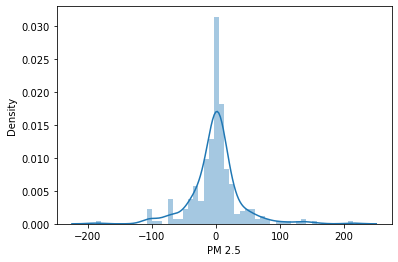

In [153]:
sns.distplot(predictions-y_test);

Text(0.5, 1.0, 'Relation between the y_test and predicted values')

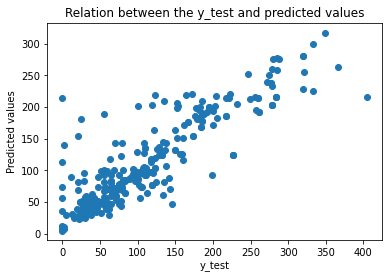

In [154]:
plt.scatter(y_test,predictions);
plt.xlabel('y_test');
plt.ylabel('Predicted values');
plt.title('Relation between the y_test and predicted values')

## Evaluating the model using the most common evaluation metrics from scratch

- MAE:- Mean Absolute Error
- MSE:- Mean Squared Error
- RSME:- Root Mean Squared Error

In [155]:
#python module for metrics
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  23.99122573678862
MSE:  1526.3322541740824
RMSE:  39.06830242247649


## We got good accuracy, so we will perform hyperparameter tuning to get even better accuracy.

## Hyperparameter tuning for RandomForestRegressor

**Using Random search where the model the picks the given parameters randomly and tune the model.**

In [156]:
from sklearn.model_selection import RandomizedSearchCV

In [157]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree

Creating the paramgrid which contains parameter combinations of RandomForestRegressor and those params are sent into the random cv model to train RandomForestRegressor

In [158]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [159]:
rfr_model=RandomForestRegressor()

In [160]:
#initialzing the RandomSearchCV model
random_cv=RandomizedSearchCV(estimator=rfr_model,param_distributions=param_grid,scoring='neg_mean_squared_error',n_iter=100,cv=5,verbose=10)

In [161]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, score=-2774.019, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, score=-2984.094, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, score=-2677.133, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, score=-2666.736, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, score=-3299.648, total=   0.6s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20, score=-1981.457, total=   1.1s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.7s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20, score=-1950.247, total=   1.0s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.7s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20, score=-1873.696, total=   1.0s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.7s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20, score=-1872.094, total=   0.9s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.6s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=20, score=-2399.619, total=   0.9s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25, score=-1928.267, total=   0.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25, score=-1990.412, total=   0.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25, score=-1856.058, total=   0.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=5, max_features=auto, max

[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, score=-1897.400, total=   0.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, score=-1868.601, total=   0.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, score=-1789.765, total=   0.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, score=-1773.090, total=   0.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15

[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, score=-2994.121, total=   0.8s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, score=-2700.535, total=   0.8s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, score=-2690.653, total=   0.8s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=5, score=-3303.097, total=   0.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_de

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-2217.830, total=   1.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=-2804.801, total=   1.1s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30, score=-1958.761, total=   1.0s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30, score=-1959.801, total=   1.1s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max

[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, score=-2130.816, total=   0.8s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, score=-3079.261, total=   0.6s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, score=-2903.543, total=   0.7s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, score=-2955.806, total=   1.0s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_fea

[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, score=-2121.020, total=   0.2s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, score=-2087.604, total=   0.2s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, score=-2056.955, total=   0.2s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, score=-2717.180, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=

[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, score=-1804.104, total=   1.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, score=-1791.679, total=   1.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, score=-2316.721, total=   1.6s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, score=-2244.018, total=   1.2s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt,

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, score=-1536.687, total=   1.1s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, score=-1939.112, total=   1.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25, score=-1560.527, total=   2.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25, score=-1434.105, total=   2.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_de

[CV]  n_estimators=1200, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=5, score=-3318.326, total=   1.5s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5, score=-2148.407, total=   0.7s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5, score=-2123.019, total=   0.7s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5, score=-2017.124, total=   0.7s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_dept

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=25, score=-2788.081, total=   1.5s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=25, score=-2958.616, total=   1.2s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=25, score=-2695.388, total=   1.2s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=25, score=-2683.653, total=   1.3s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=5, max_features=

[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=25, score=-2972.316, total=   0.8s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=25, score=-2697.078, total=   0.8s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=25, score=-2728.892, total=   0.8s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=25, score=-3309.762, total=   0.8s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=2, max_fe

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, score=-1362.220, total=   1.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, score=-1472.761, total=   1.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, score=-1835.961, total=   1.3s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30, score=-1890.767, total=   0.8s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_dept

[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5, score=-2379.715, total=   0.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=5, score=-2919.242, total=   0.2s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, score=-2784.114, total=   0.7s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, score=-2961.964, total=   0.7s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=aut

[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-3282.144, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, score=-1585.724, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, score=-1484.140, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, score=-1363.819, total=   0.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  7.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=10)

In [162]:
#getting the best parameters
random_cv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [163]:
#getting best score
random_cv.best_score_

-1523.7839247754887

## Evaluating the model

In [164]:
predictions=random_cv.predict(x_test)

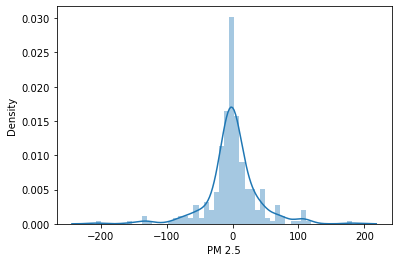

In [165]:
sns.distplot(y_test-predictions);

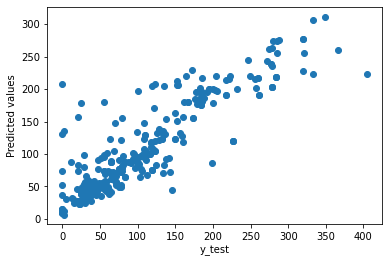

In [166]:
plt.scatter(y_test,predictions);
plt.xlabel('y_test');
plt.ylabel('Predicted values');

In [167]:
from sklearn import metrics

In [168]:
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  24.07153331917732
MSE:  1527.489515567036
RMSE:  39.08311036198419


In [169]:
import pickle
with open('AQI_RFR_model.pkl','wb') as file:
    pickle.dump(random_cv,file)